https://www.robots.ox.ac.uk/~vgg/data/flowers/102/categories.html -> dataset labels

https://www.robots.ox.ac.uk/~vgg/data/flowers/102/ -> official oxford 102 dataset

https://gist.github.com/JosephKJ/94c7728ed1a8e0cd87fe6a029769cde1 -> github with organised text labels for dataset

# Oxford 102 Flowers - labels

In [43]:
labels = [
  'pink primrose'
 ,'hard-leaved pocket orchid'
 ,'canterbury bells'
 ,'sweet pea'
 ,'english marigold'
 ,'tiger lily'
 ,'moon orchid'
 ,'bird of paradise'
 ,'monkshood'
 ,'globe thistle'
 ,'snapdragon'
 ,"colt's foot"
 ,'king protea'
 ,'spear thistle'
 ,'yellow iris'
 ,'globe-flower'
 ,'purple coneflower'
 ,'peruvian lily'
 ,'balloon flower'
 ,'giant white arum lily'
 ,'fire lily'
 ,'pincushion flower'
 ,'fritillary'
 ,'red ginger'
 ,'grape hyacinth'
 ,'corn poppy'
 ,'prince of wales feathers'
 ,'stemless gentian'
 ,'artichoke'
 ,'sweet william'
 ,'carnation'
 ,'garden phlox'
 ,'love in the mist'
 ,'mexican aster'
 ,'alpine sea holly'
 ,'ruby-lipped cattleya'
 ,'cape flower'
 ,'great masterwort'
 ,'siam tulip'
 ,'lenten rose'
 ,'barbeton daisy'
 ,'daffodil'
 ,'sword lily'
 ,'poinsettia'
 ,'bolero deep blue'
 ,'wallflower'
 ,'marigold'
 ,'buttercup'
 ,'oxeye daisy'
 ,'common dandelion'
 ,'petunia'
 ,'wild pansy'
 ,'primula'
 ,'sunflower'
 ,'pelargonium'
 ,'bishop of llandaff'
 ,'gaura'
 ,'geranium'
 ,'orange dahlia'
 ,'pink-yellow dahlia'
 ,'cautleya spicata'
 ,'japanese anemone'
 ,'black-eyed susan'
 ,'silverbush'
 ,'californian poppy'
 ,'osteospermum'
 ,'spring crocus'
 ,'bearded iris'
 ,'windflower'
 ,'tree poppy'
 ,'gazania'
 ,'azalea'
 ,'water lily'
 ,'rose'
 ,'thorn apple'
 ,'morning glory'
 ,'passion flower'
 ,'lotus'
 ,'toad lily'
 ,'anthurium'
 ,'frangipani'
 ,'clematis'
 ,'hibiscus'
 ,'columbine'
 ,'desert-rose'
 ,'tree mallow'
 ,'magnolia'
 ,'cyclamen '
 ,'watercress'
 ,'canna lily'
 ,'hippeastrum '
 ,'bee balm'
 ,'ball moss'
 ,'foxglove'
 ,'bougainvillea'
 ,'camellia'
 ,'mallow'
 ,'mexican petunia'
 ,'bromelia'
 ,'blanket flower'
 ,'trumpet creeper'
 ,'blackberry lily'
]

# Dataset Decompression

In [44]:
import tarfile
import os

# Path to the .tgz file
tgz_path = '/content/102flowers.tgz'
extract_dir = '/content/flower'

# Extract the .tgz file
with tarfile.open(tgz_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

print(f"Extracted files to {extract_dir}")

Extracted files to /content/flower


In [45]:
# prompt: extract image labels from .mat file

import scipy.io as sio

# Load the .mat file
mat_file_path = '/content/imagelabels.mat' # Replace with actual path
mat_data = sio.loadmat(mat_file_path)

# Access the image labels
image_labels = mat_data['labels']

# Print or process the image labels
image_labels

array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)

# Select Random Flowers' images

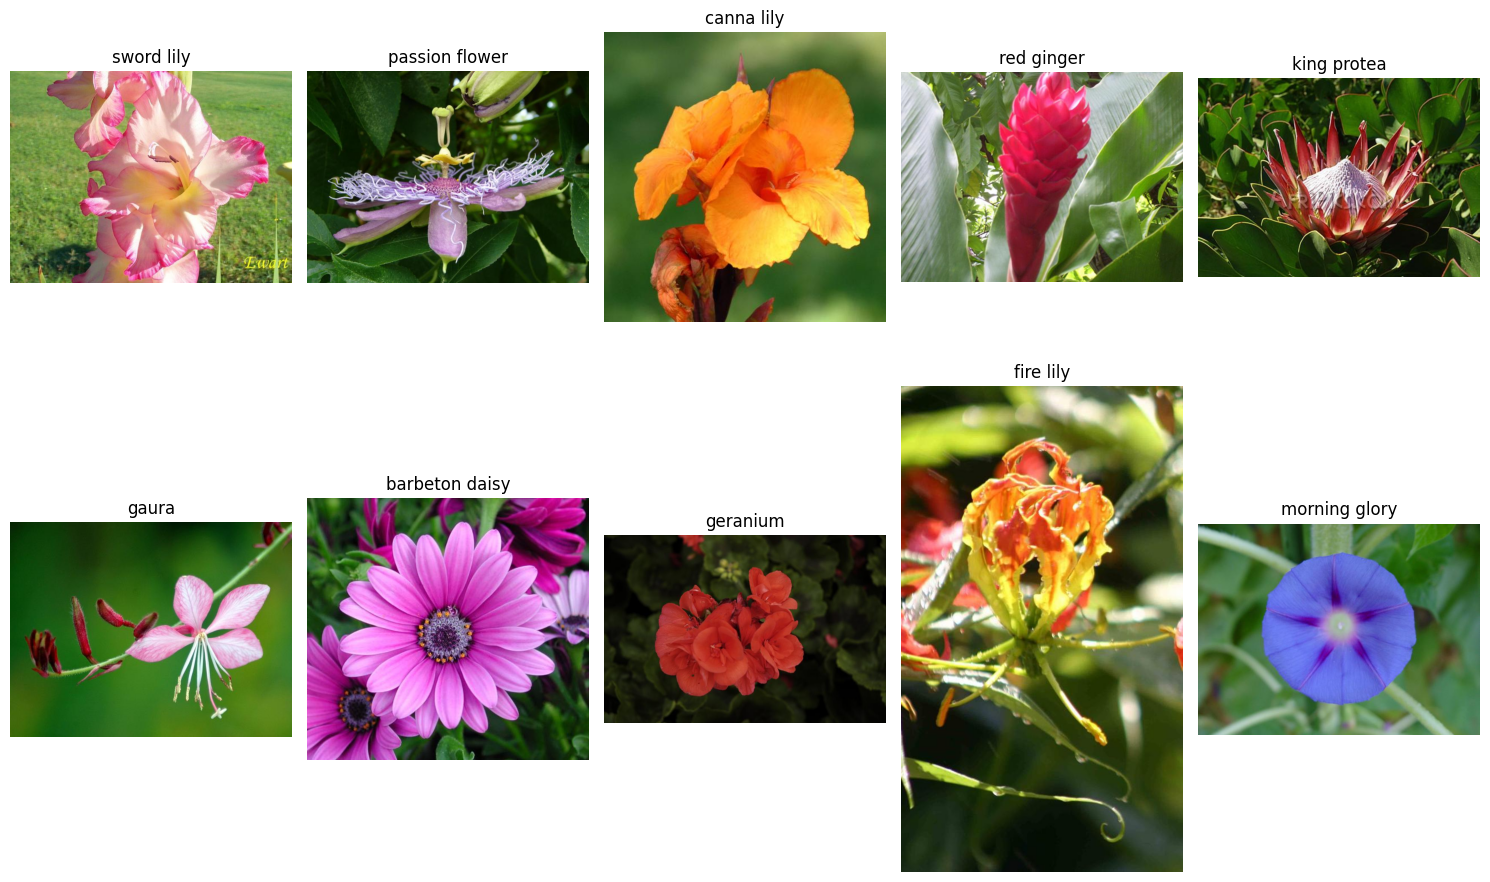

In [46]:
import os
import random
import matplotlib.pyplot as plt
from scipy.io import loadmat
from PIL import Image

# Load the .mat file containing image labels
mat_file_path = "/content/imagelabels.mat"  # Adjust path as needed
mat_data = loadmat(mat_file_path)

# Access the image labels (1-based indexing in MATLAB)
image_labels = mat_data['labels'][0]  # Flatten the array

# Path to extracted image folder
image_folder = "/content/flower/jpg"  # Adjust path as needed

# List all image files and sort to match image numbering
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".jpg")])

# Randomly select 10 images
random_indices = random.sample(range(len(image_files)), 10)

# Plot images and labels
plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    image_path = os.path.join(image_folder, image_files[idx])
    try:
        # Load the image
        img = Image.open(image_path)

        # MATLAB labels are 1-based; Python uses 0-based, so subtract 1
        label = image_labels[idx]

        # Display image
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(img)
        plt.title(f"{labels[label-1]}")
        plt.axis('off')

    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

plt.tight_layout()


# Select by label

In [51]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the function to find and display photos by label
def find_photos_by_label(label_text, num_photos=5):
    """
    Finds and displays a specified number of photos based on a given text label.

    Args:
        label_text: The text label of the flower to search for.
        num_photos: The number of photos to return.

    Returns:
        A list of image paths corresponding to the specified label,
        or an empty list if no images are found or an error occurs.
    """
    try:
        # Find the corresponding label index (assuming MATLAB-like 1-based indexing)
        label_index = labels.index(label_text) + 1
    except ValueError:
        print(f"Error: Label '{label_text}' not found in the dataset.")
        return []

    # Collect image paths matching the label index
    image_paths = [
        os.path.join(image_folder, image_files[i])
        for i in range(len(image_labels))
        if image_labels[i] == label_index
    ]

    # If no images are found, return an empty list
    if not image_paths:
        print(f"No images found for label '{label_text}'.")
        return []

    # Randomly select the requested number of photos (or less if not enough available)
    selected_image_paths = random.sample(image_paths, min(num_photos, len(image_paths)))

    # Display the selected images
    num_cols = 3  # Limit to 3 photos per row
    num_rows = (len(selected_image_paths) + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on rows
    for i, image_path in enumerate(selected_image_paths):
        try:
            print(image_path)
            img = Image.open(image_path)
            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(img)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

    plt.tight_layout()
    plt.show()

    return selected_image_paths



flower_label = "balloon flower"  # Desired flower label
number_of_images = 20  # Desired number of images

print(flower_label)
found_images = find_photos_by_label(flower_label, number_of_images)


Output hidden; open in https://colab.research.google.com to view.